In [1]:
import numpy as np
from iholt import Holt_model
from scipy.optimize import minimize

# Construct the synthetic data
s = np.sin(np.arange(0, 18, 0.1))
s = np.vstack((s, s+0.5))

# split series
s_test = s[:, -10:]
s = s[:, :-10]

# Build model
holt_model = Holt_model(s)

# Optimize
bnds = [[0, 1]] * 8
x0 = np.ones(8) * 0.5   # Parameters [a11, a12, a21, a22, b11, b12, b21, b22]

result = holt_model.train(x0, bnds)

print(result)

      fun: 0.006760247226306666
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.01165723, -0.00673643,  0.0300269 ,  0.02535276, -0.56662641,
       -0.57461157,  0.5728127 ,  0.58098854])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 405
      nit: 18
   status: 0
  success: True
        x: array([0.59414529, 0.61823124, 0.62388291, 0.59976205, 0.64503821,
       0.64501744, 0.64490451, 0.64492404])


In [8]:
It, Lt, Tt = holt_model.pred(result.x, 10, s_test)

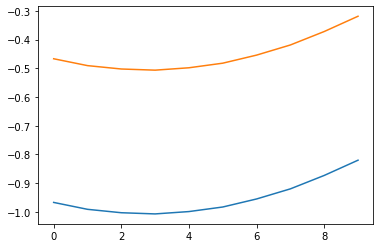

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# predicted series
s0 = np.squeeze(np.array(It))[:, 0]
s1 = np.squeeze(np.array(It))[:, 1]
plt.plot(s0[-10:])
plt.plot(s1[-10:])

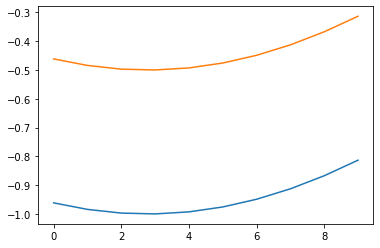

In [10]:
# original series
plt.plot(s_test[0, :])
plt.plot(s_test[1, :])